In [2]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 2.3 MB/s eta 0:00:06
    --------------------------------------- 0.2/13.3 MB 2.1 MB/s eta 0:00:07
   - -------------------------------------- 0.4/13.3 MB 3.0 MB/s eta 0:00:05
   - -------------------------------------- 0.5/13.3 MB 3.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/13.3 MB 3.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.9/13.3 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/13.3 MB 3.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/13.3 MB 3.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/13.3 MB 3.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/13.3 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/13.3 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/13.3 MB 4.1 MB/s eta 0:00:03
   ---

In [5]:
import pandas as pd
from prophet import Prophet

In [6]:
df = pd.read_csv("C:\\Users\\subal\\Downloads\\BTC-USD.csv")
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2023-08-23  26431.640625
1    2023-08-24  26162.373047
2    2023-08-25  26047.667969
3    2023-08-26  26008.462891
4    2023-08-27  26089.693359
..          ...           ...
362  2024-08-19  59493.453125
363  2024-08-20  59012.792969
364  2024-08-21  61175.191406
365  2024-08-22           NaN
366  2024-08-23  60968.042969

[367 rows x 2 columns]


In [7]:
prophet = Prophet()
prophet.fit(df)

11:45:09 - cmdstanpy - INFO - Chain [1] start processing
11:45:10 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2023-08-23
1   2023-08-24
2   2023-08-25
3   2023-08-26
4   2023-08-27
..         ...
726 2025-08-19
727 2025-08-20
728 2025-08-21
729 2025-08-22
730 2025-08-23

[731 rows x 1 columns]


In [9]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2025-02-05,49960.051452,35112.390690,64719.166720
532,2025-02-06,49804.579777,34610.796396,64951.751548
533,2025-02-07,49603.523187,34296.965710,64254.788109
534,2025-02-08,49467.638281,34034.357988,65059.935182
535,2025-02-09,49451.567769,33791.969861,64338.276076
...,...,...,...,...
726,2025-08-19,37475.799034,-11604.949843,83824.661153
727,2025-08-20,37662.954967,-11195.239225,84854.863993
728,2025-08-21,37507.483292,-12254.305602,83313.459699
729,2025-08-22,37306.426701,-11734.270671,83478.880863


### Ploting predictions

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

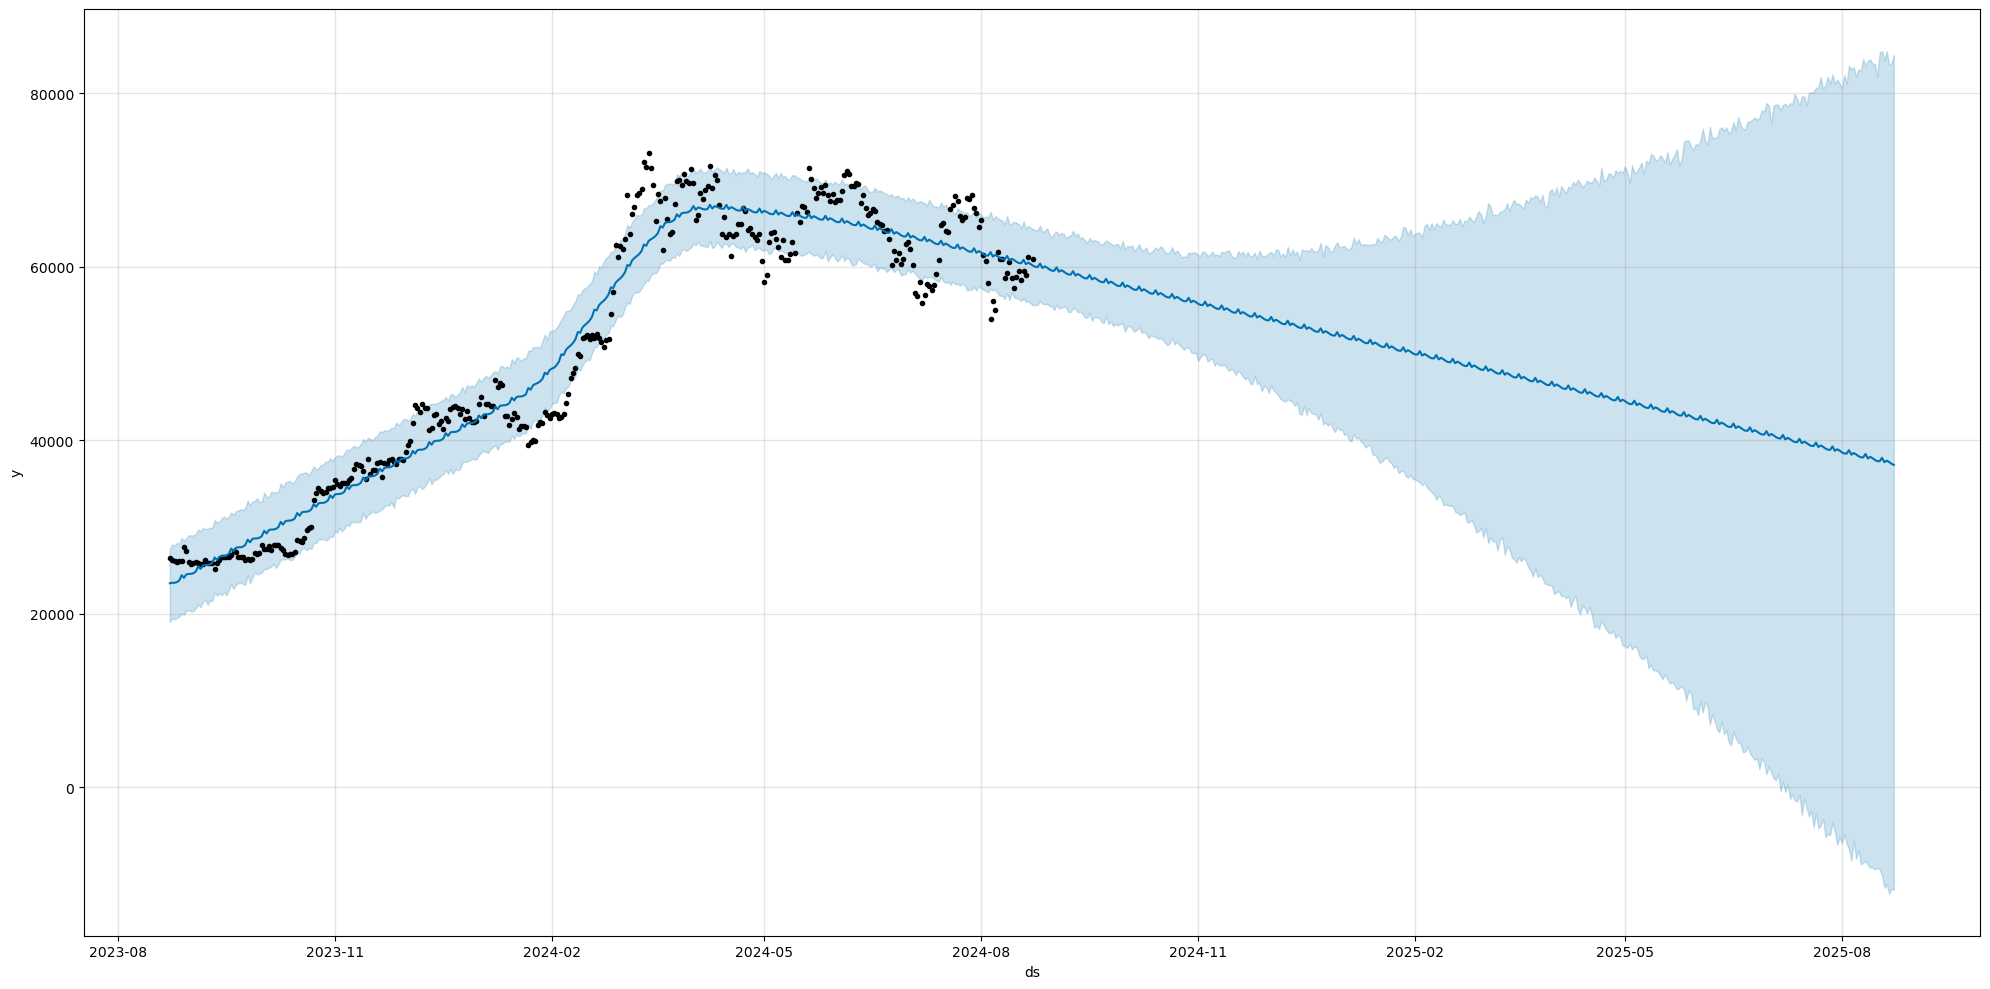

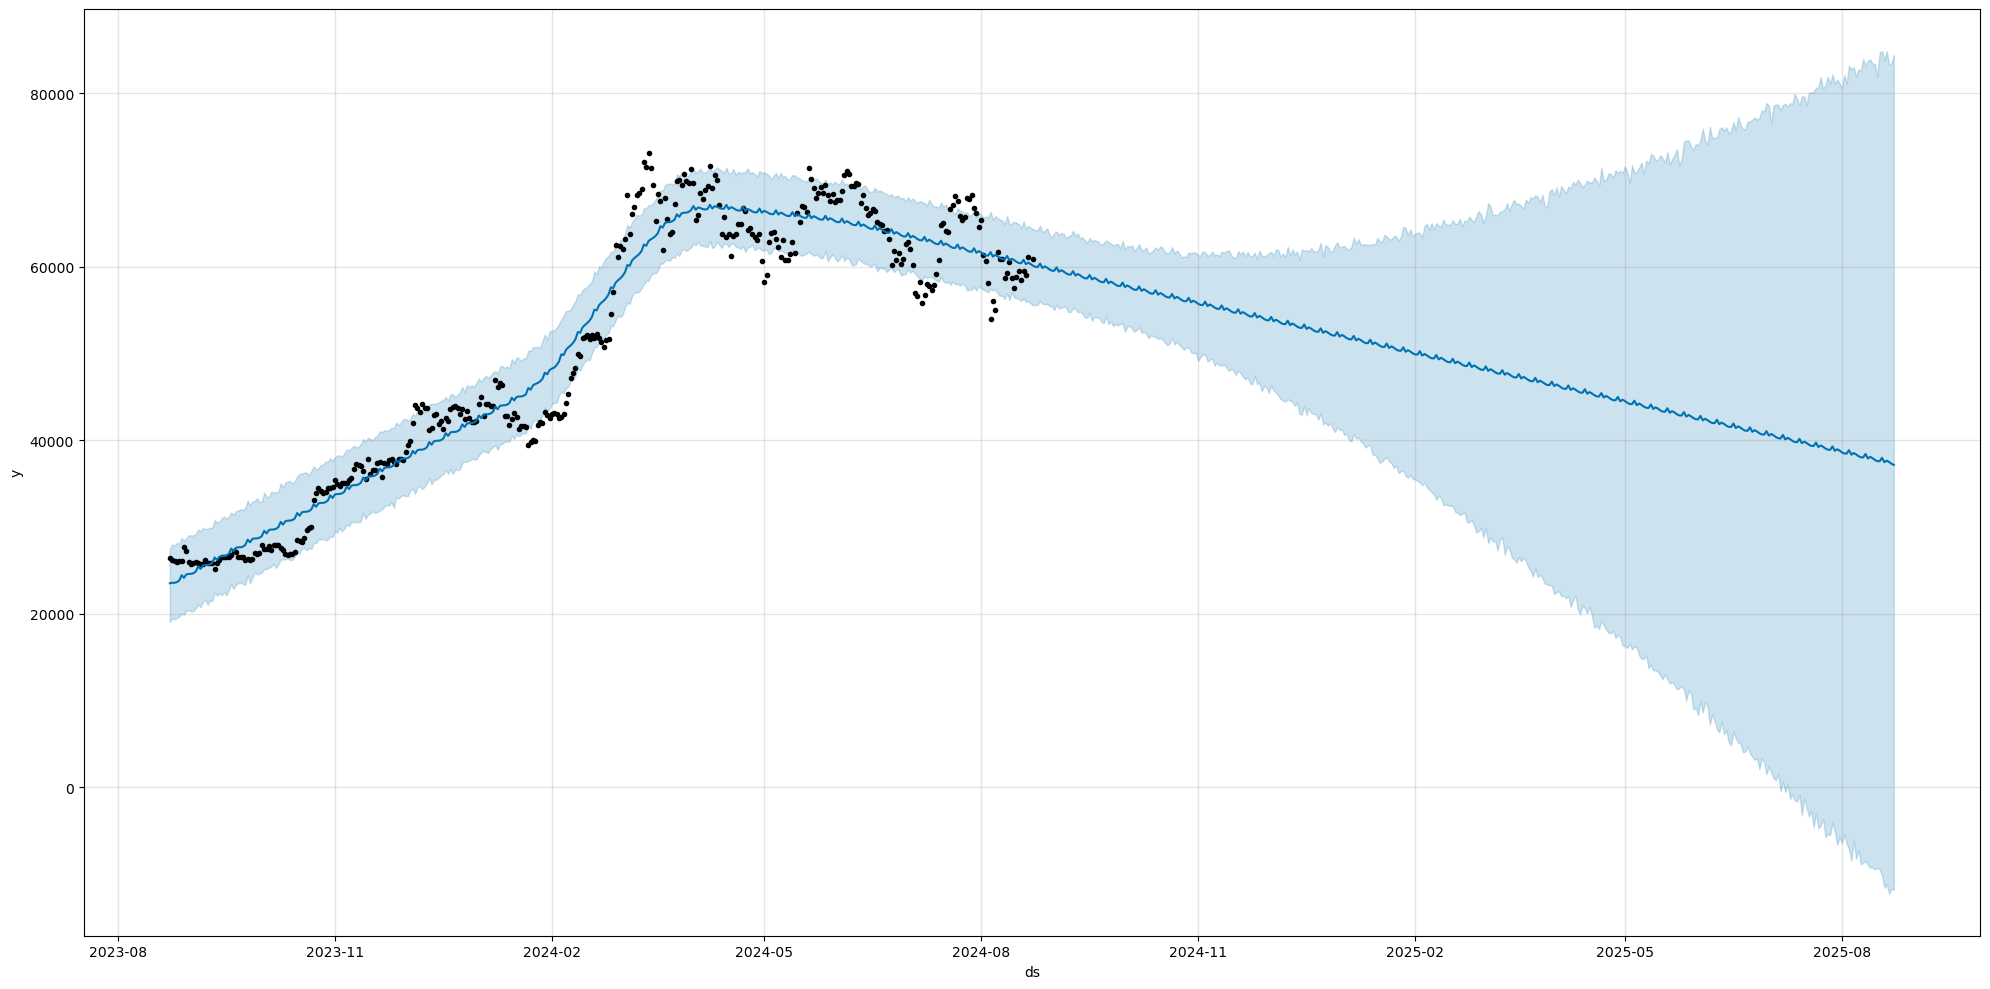

In [13]:
from prophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))